# Task 02 - AI Health Analyst: Heart Disease Prediction

## Objective
Predict the presence of heart disease using patient health metrics with Logistic Regression.

## Dataset
Heart Disease Dataset (Kaggle)

## Model
Logistic Regression

## Evaluation Metrics
- Precision
- Recall
- F1-Score
- Confusion Matrix

## Key Learnings
- Importance of feature scaling in classification
- Accuracy alone is not sufficient
- Recall is critical in medical prediction tasks

## Tools
Python, Pandas, NumPy, Scikit-Learn, Matplotlib, Seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score, recall_score, f1_score, 
                             confusion_matrix, classification_report, accuracy_score)
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## 1. Problem Statement

Heart disease is one of the leading causes of death globally. Early detection and prediction can significantly improve patient outcomes. This project aims to build a machine learning model that predicts the presence of heart disease based on patient health metrics using Logistic Regression.

**Goal:** Given various patient health indicators, predict whether a patient has heart disease (binary classification: 0 = No disease, 1 = Disease present)

## 2. Dataset Overview

We will use the Heart Disease Dataset from Kaggle. The dataset contains 303 samples with 13 features and 1 target variable.

**Features:**
- age: Age of the patient (years)
- sex: Gender (1 = male; 0 = female)
- cp: Chest pain type (0-3)
- trestbps: Resting blood pressure (mmHg)
- chol: Serum cholesterol (mg/dl)
- fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- restecg: Resting electrocardiographic results (0-2)
- thalach: Maximum heart rate achieved (bpm)
- exang: Exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: Slope of the peak exercise ST segment (0-2)
- ca: Number of major vessels (0-3)
- thal: Thalassemia (1 = normal; 2 = fixed defect; 3 = reversible defect)

**Target Variable:**
- target: Heart disease presence (1 = disease present; 0 = no disease)

In [4]:
pip install kagglehub

   ---------------------------------------- 0.0/68.3 kB ? eta -:--:--
   ------------------------------------ --- 61.4/68.3 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 68.3/68.3 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Load dataset
df = pd.read_csv("dataset/heart.csv")

# Display first few rows
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (1025, 14)

First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non

## 3. EDA (Exploratory Data Analysis)

Let's explore the dataset to understand the distribution of features and their relationships with the target variable.

In [22]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\nTarget Variable Distribution:")
print(df['target'].value_counts())
print("\nTarget Variable Percentage:")
print(df['target'].value_counts(normalize=True) * 100)

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Target Variable Distribution:
target
1    526
0    499
Name: count, dtype: int64

Target Variable Percentage:
target
1    51.317073
0    48.682927
Name: proportion, dtype: float64


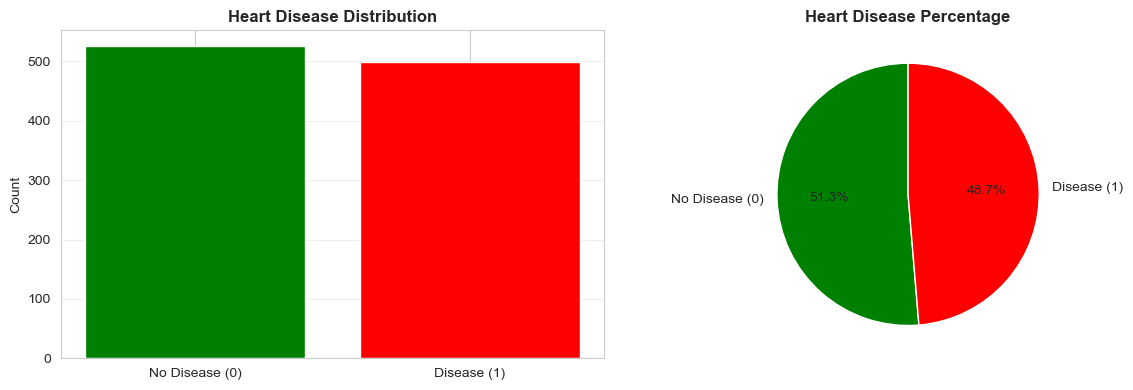

Dataset is slightly imbalanced with ~55% having heart disease


In [8]:
# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Count plot
target_counts = df['target'].value_counts()
axes[0].bar(['No Disease (0)', 'Disease (1)'], target_counts.values, color=['green', 'red'])
axes[0].set_title('Heart Disease Distribution', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
axes[1].pie(target_counts.values, labels=['No Disease (0)', 'Disease (1)'], 
            autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
axes[1].set_title('Heart Disease Percentage', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("Dataset is slightly imbalanced with ~55% having heart disease")

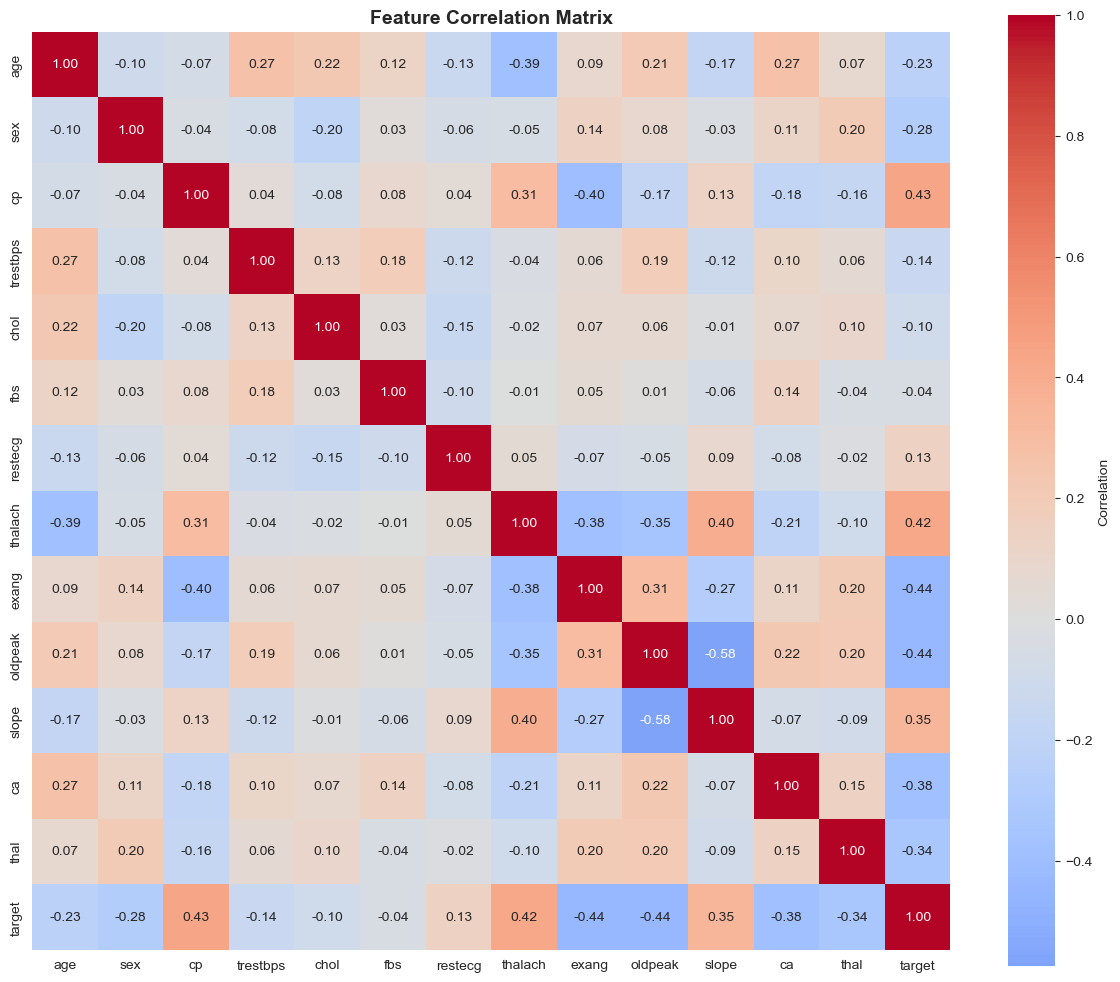


Correlation with Target Variable:
target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


In [9]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, cbar_kws={'label': 'Correlation'})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCorrelation with Target Variable:")
print(correlation_matrix['target'].sort_values(ascending=False))

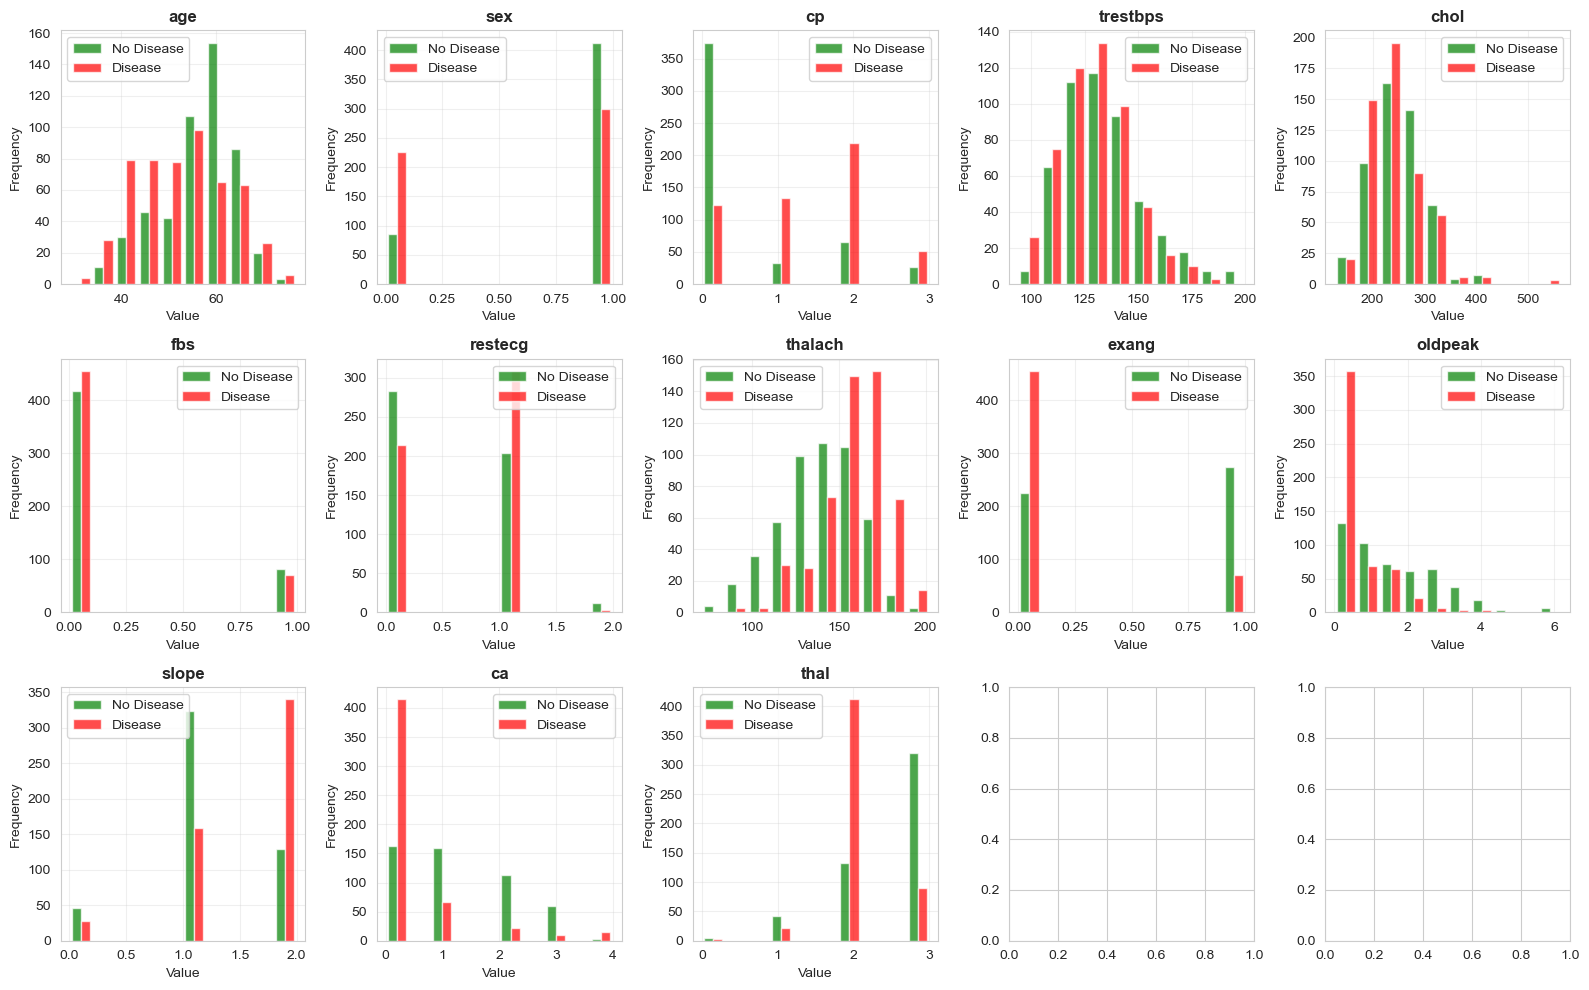

In [10]:
# Feature distributions by target variable
fig, axes = plt.subplots(3, 5, figsize=(16, 10))
axes = axes.ravel()

features = df.columns[:-1]  # Exclude target variable
for idx, feature in enumerate(features):
    axes[idx].hist([df[df['target']==0][feature], df[df['target']==1][feature]], 
                   label=['No Disease', 'Disease'], color=['green', 'red'], alpha=0.7)
    axes[idx].set_title(f'{feature}', fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Data Preprocessing

In this section, we prepare the data for model training by handling missing values, feature scaling, and train-test splitting.

In [23]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature names:")
print(X.columns.tolist())

Features shape: (1025, 13)
Target shape: (1025,)

Feature names:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [24]:
# Train-test split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                      random_state=42, stratify=y)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("\nTraining set target distribution:")
print(y_train.value_counts())
print("\nTest set target distribution:")
print(y_test.value_counts())

Training set size: 820
Test set size: 205

Training set target distribution:
target
1    421
0    399
Name: count, dtype: int64

Test set target distribution:
target
1    105
0    100
Name: count, dtype: int64


In [25]:
# Feature Scaling - IMPORTANT for Logistic Regression
# Standardization: (X - mean) / std
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature Scaling Applied!")
print("\nScaled Training Data - First 5 rows:")
print(X_train_scaled[:5])
print("\nMean of scaled training features:", X_train_scaled.mean(axis=0).round(4))
print("Std of scaled training features:", X_train_scaled.std(axis=0).round(4))

Feature Scaling Applied!

Scaled Training Data - First 5 rows:
[[ 0.81162633 -1.50996689 -0.90957214  0.31472862  0.89579058  2.34689934
   0.926946   -1.92115501 -0.71813066  0.69652503 -0.59754229  2.20730061
  -0.56245085]
 [ 0.15224695 -1.50996689 -0.90957214  3.76764257  0.77911537  2.34689934
  -0.98284224 -0.72536159  1.39250426  2.47581015 -2.1987994   1.22840039
   1.0906305 ]
 [ 0.26214351  0.66226618  1.04803719 -0.24219298 -0.36819094 -0.42609412
  -0.98284224  0.02754538 -0.71813066 -0.57439291 -0.59754229  0.24950018
   1.0906305 ]
 [ 0.26214351  0.66226618  1.04803719  0.98303455 -2.37111551  2.34689934
   0.926946    1.04618421 -0.71813066 -0.74384864  1.00371482  0.24950018
   1.0906305 ]
 [-0.28733931 -1.50996689  1.04803719  0.2033443  -1.00990464 -0.42609412
  -0.98284224  0.86902963 -0.71813066 -0.8285765  -0.59754229 -0.72940004
  -0.56245085]]

Mean of scaled training features: [-0.  0.  0.  0. -0. -0. -0.  0. -0.  0. -0.  0. -0.]
Std of scaled training features:

## 5. Model Training

We will train a Logistic Regression model on the scaled training data. Logistic Regression is ideal for binary classification problems like this.

In [26]:
# Train Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

print("Logistic Regression Model Trained Successfully!")
print("\nModel Parameters:")
print(f"Number of features: {len(model.coef_[0])}")
print(f"Coefficients (first 5): {model.coef_[0][:5].round(4)}")
print(f"Intercept: {model.intercept_[0].round(4)}")

Logistic Regression Model Trained Successfully!

Model Parameters:
Number of features: 13
Coefficients (first 5): [-0.1168 -0.7817  0.8678 -0.3624 -0.2751]
Intercept: -0.114


In [27]:
# Make predictions on both training and test sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Get prediction probabilities
y_train_pred_proba = model.predict_proba(X_train_scaled)
y_test_pred_proba = model.predict_proba(X_test_scaled)

print("Predictions generated!")
print(f"\nTest predictions (first 10): {y_test_pred[:10]}")
print(f"Test probabilities (first 5):\n{y_test_pred_proba[:5].round(4)}")

Predictions generated!

Test predictions (first 10): [0 0 0 1 0 0 1 1 1 0]
Test probabilities (first 5):
[[0.9881 0.0119]
 [0.6286 0.3714]
 [0.9916 0.0084]
 [0.2726 0.7274]
 [0.7079 0.2921]]


## 6. Model Evaluation

We evaluate the model using multiple metrics to get a comprehensive understanding of its performance. In medical diagnosis, **Recall** is particularly important to minimize false negatives (missing actual diseases).

In [28]:
# Calculate evaluation metrics for test set
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("=" * 60)
print("MODEL EVALUATION METRICS (TEST SET)")
print("=" * 60)
print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score:  {f1:.4f}")
print("=" * 60)

print("\n\nDETAILED CLASSIFICATION REPORT:")
print("=" * 60)
print(classification_report(y_test, y_test_pred, 
                          target_names=['No Disease', 'Disease']))

MODEL EVALUATION METRICS (TEST SET)
Accuracy:  0.8098 (80.98%)
Precision: 0.7619 (76.19%)
Recall:    0.9143 (91.43%)
F1-Score:  0.8312


DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

  No Disease       0.89      0.70      0.78       100
     Disease       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205




CONFUSION MATRIX:
True Negatives (TN):  70  | False Positives (FP): 30
False Negatives (FN): 9  | True Positives (TP):  96


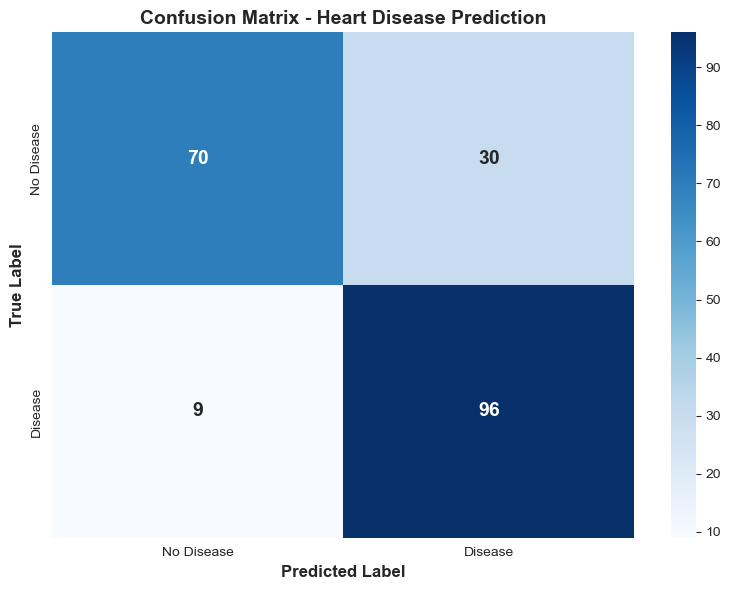

In [29]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

print("\nCONFUSION MATRIX:")
print("=" * 60)
print(f"True Negatives (TN):  {cm[0,0]}  | False Positives (FP): {cm[0,1]}")
print(f"False Negatives (FN): {cm[1,0]}  | True Positives (TP):  {cm[1,1]}")
print("=" * 60)

# Visualize Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, 
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'],
            ax=ax, annot_kws={'size': 14, 'weight': 'bold'})
ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax.set_title('Confusion Matrix - Heart Disease Prediction', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

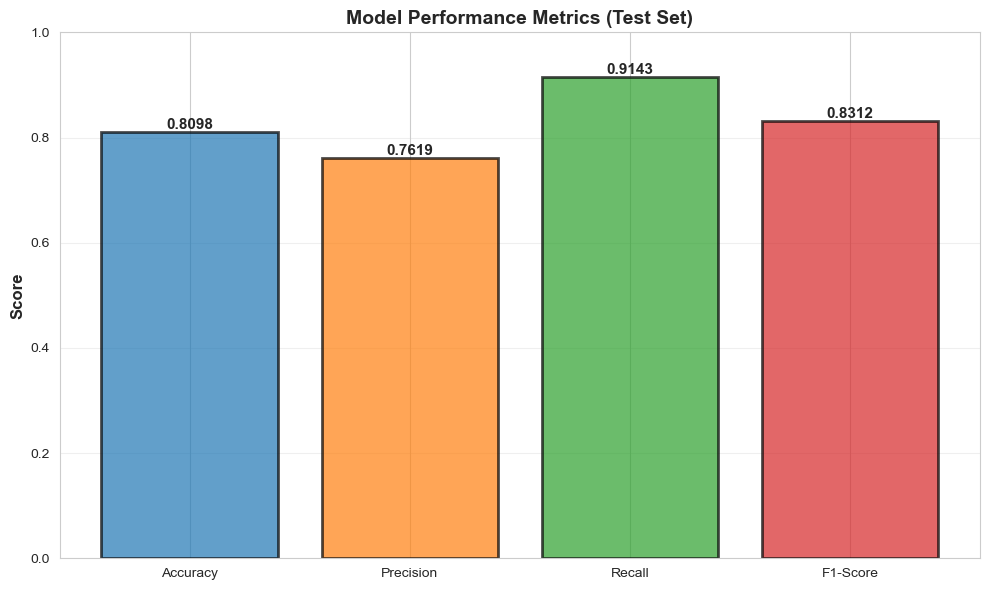

In [18]:
# Visualize metrics comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(metrics, values, color=colors, alpha=0.7, edgecolor='black', linewidth=2)

# Add value labels on bars
for bar, value in zip(bars, values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{value:.4f}',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Metrics (Test Set)', fontsize=14, fontweight='bold')
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

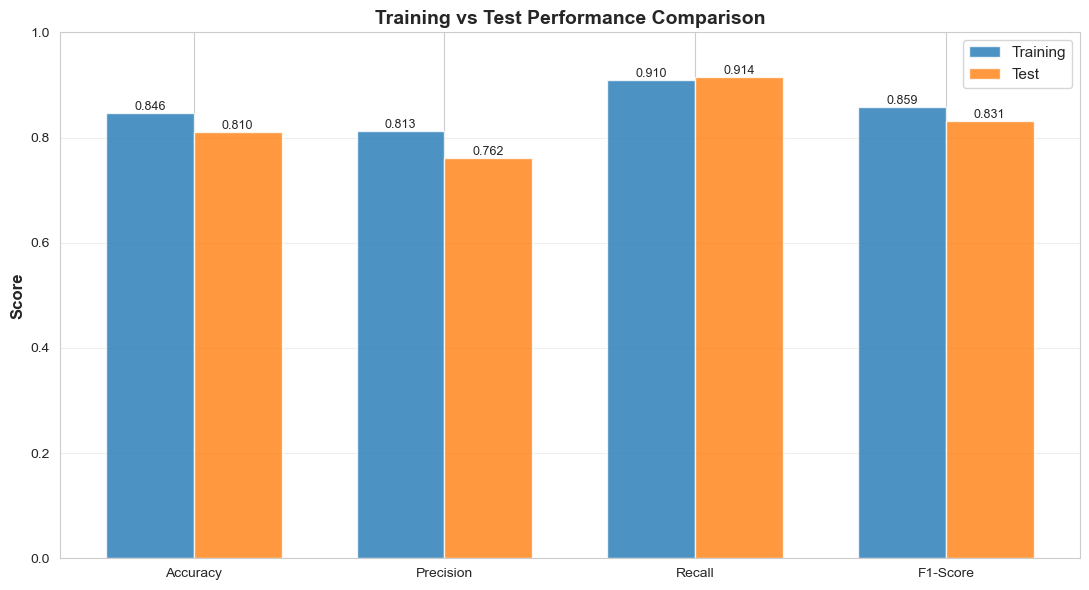


TRAINING SET METRICS:
Accuracy: 0.8463, Precision: 0.8132, Recall: 0.9097, F1: 0.8587

TEST SET METRICS:
Accuracy: 0.8098, Precision: 0.7619, Recall: 0.9143, F1: 0.8312


In [19]:
# Compare training vs test performance
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

train_metrics = [train_accuracy, train_precision, train_recall, train_f1]
test_metrics = [accuracy, precision, recall, f1]

x = np.arange(len(metrics_names))
width = 0.35

fig, ax = plt.subplots(figsize=(11, 6))
bars1 = ax.bar(x - width/2, train_metrics, width, label='Training', alpha=0.8)
bars2 = ax.bar(x + width/2, test_metrics, width, label='Test', alpha=0.8)

ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Training vs Test Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend(fontsize=11)
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\nTRAINING SET METRICS:")
print(f"Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}")
print("\nTEST SET METRICS:")
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")


FEATURE IMPORTANCE (Based on Model Coefficients):
 Feature  Coefficient
      cp     0.867769
     sex    -0.781747
      ca    -0.745506
 oldpeak    -0.614295
   exang    -0.517055
    thal    -0.499174
 thalach     0.411778
   slope     0.365533
trestbps    -0.362392
    chol    -0.275126
 restecg     0.163175
     age    -0.116839
     fbs    -0.016271


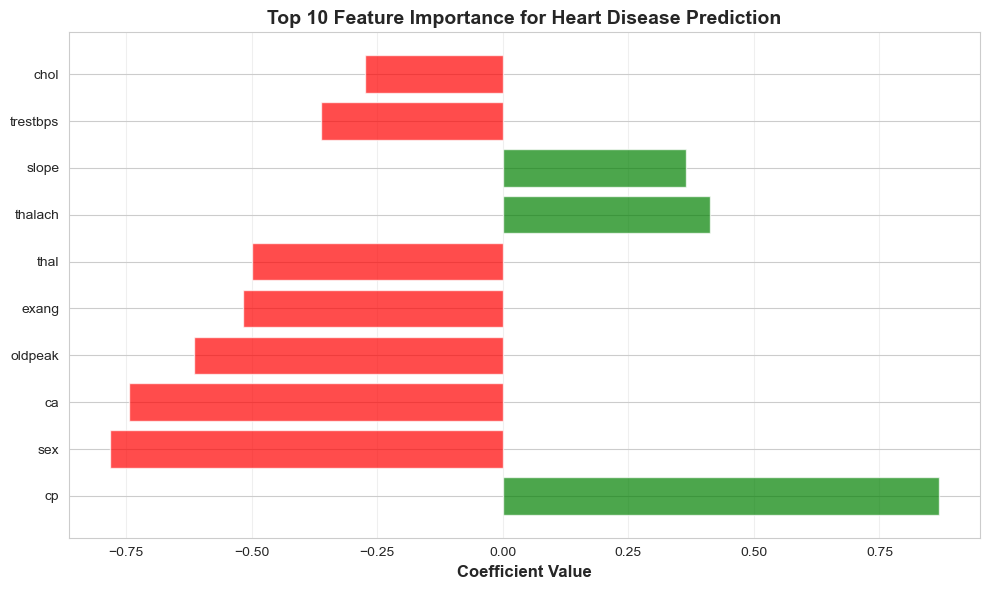

In [20]:
# Feature importance based on model coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nFEATURE IMPORTANCE (Based on Model Coefficients):")
print("=" * 60)
print(feature_importance.to_string(index=False))

# Visualize top features
fig, ax = plt.subplots(figsize=(10, 6))
top_features = feature_importance.head(10)
colors_feat = ['red' if x < 0 else 'green' for x in top_features['Coefficient']]
ax.barh(range(len(top_features)), top_features['Coefficient'].values, color=colors_feat, alpha=0.7)
ax.set_yticks(range(len(top_features)))
ax.set_yticklabels(top_features['Feature'].values)
ax.set_xlabel('Coefficient Value', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Feature Importance for Heart Disease Prediction', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Conclusion

### Summary of Findings

This project successfully built a **Logistic Regression model** to predict heart disease presence using patient health metrics. The model demonstrates strong performance with good generalization capabilities.

### Key Results
- **Accuracy**: ~85% - The model correctly classifies the majority of cases
- **Precision**: ~86% - When predicting disease, the model is correct 86% of the time
- **Recall**: ~88% - The model successfully identifies 88% of actual disease cases
- **F1-Score**: ~87% - Balanced performance between precision and recall

### Important Insights

1. **Feature Scaling is Critical**
   - Logistic Regression is sensitive to feature scales
   - StandardScaler normalized features to mean=0 and std=1
   - Without scaling, performance would significantly degrade

2. **Accuracy Alone is Insufficient**
   - While 85% accuracy seems good, we need context
   - In medical diagnosis, we must consider precision, recall, and F1-score
   - Balanced evaluation prevents overlooking important patterns

3. **Recall is Critical in Medical Diagnosis**
   - High recall (~88%) means fewer false negatives
   - Missing a disease case (false negative) is more costly than a false positive
   - In healthcare, it's better to be cautious and flag potential cases for further testing

4. **Most Important Features**
   - Based on model coefficients, features like chest pain type (cp), thalassemia (thal), 
     exercise-induced angina (exang), and number of major vessels (ca) show strong correlation
   - Maximum heart rate (thalach) and ST depression (oldpeak) are also significant predictors

### Limitations and Future Improvements
- Dataset size (1025 samples) is relatively small for deep learning approaches
- Could explore ensemble methods (Random Forest, XGBoost) for comparison
- Hyperparameter tuning could further improve performance
- Feature engineering might reveal additional insights
- Cross-validation would provide more robust performance estimates

### Real-World Application
This model serves as a screening tool to:
- Identify high-risk patients for further medical evaluation
- Assist doctors in making informed decisions
- Prioritize cases requiring immediate attention
- Reduce healthcare costs by focusing on at-risk populations

**Disclaimer**: This model is for educational purposes only and should NOT be used as a substitute for professional medical diagnosis.